# National Electronic Injury Surveillance System (NEISS)

CPSC’s National Electronic Injury Surveillance System ([NEISS](https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data/)) is a national probability sample of hospitals in the U.S. and its territories. Patient information is collected from each NEISS hospital for every emergency visit involving an injury associated with consumer products. From this sample, the total number of product-related injuries treated in hospital emergency rooms nationwide can be estimated. This web access to NEISS allows certain estimates to be retrieved on-line. These estimates can be focused by setting some or all of the following variables (and an example of each):

- Date (one year maximum range; e.g., how many injuries were treated in 1996)
- Product (e.g., how many bicycle injuries occurred)
- Sex (e.g., how many injuries occurred to women)
- Age (e.g., how many injuries occurred to people aged 35-55)
- Diagnosis (e.g., how many lacerations occurred)
- Disposition (e.g., how many people were admitted to the hospital)
- Locale (e.g., how many injuries occurred at a school)
- Body part (e.g., how many injuries involved the knee)

### Getting the Data

In [1]:
# Standard
import numpy as np
import pandas as pd
import os
from pandas import Series, DataFrame

# Stats
import math
from scipy import stats
import sklearn

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# Command so that plots appear in the iPython Notebook
%matplotlib inline 

In [2]:
df_NEISS = pd.read_excel('NEISS2014.xlsx')
df_NEISS['BodyPartCode'] = df_NEISS['body_part']
df_NEISS['DiagnosisCode'] = df_NEISS['diag']
df_NEISS['DispositionCode'] = df_NEISS['disposition']
df_NEISS = df_NEISS.drop(['body_part','diag','disposition'],1)
df_NEISS.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag_other,location,fmv,prod1,prod2,narrative,BodyPartCode,DiagnosisCode,DispositionCode
0,141200216,2014-10-23,63,99.704,M,21,Female,None listed,NaN,NaN,1,0,679,1807,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...,75,62,1
1,140117851,2014-01-04,63,81.576,M,62,Female,White,NaN,NaN,1,0,1807,115,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...,79,57,1
2,150144993,2014-08-17,63,99.704,M,21,Female,None listed,NaN,NaN,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT,83,57,1
3,150230176,2014-07-27,63,99.704,M,30,Female,None listed,NaN,NaN,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...,79,64,1
4,141220717,2014-09-08,63,99.704,M,16,Male,None listed,NaN,NaN,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND,82,57,1


In [3]:
df_NEISS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 18 columns):
CPSC Case #        65499 non-null int64
trmt_date          65499 non-null datetime64[ns]
psu                65499 non-null int64
weight             65499 non-null float64
stratum            65499 non-null object
age                65499 non-null int64
sex                65499 non-null object
race               65499 non-null object
race_other         3577 non-null object
diag_other         8119 non-null object
location           65499 non-null int64
fmv                65499 non-null int64
prod1              65499 non-null int64
prod2              8446 non-null float64
narrative          65499 non-null object
BodyPartCode       65499 non-null int64
DiagnosisCode      65499 non-null int64
DispositionCode    65499 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(6)
memory usage: 9.5+ MB


In [105]:
df_NEISS.shape

(65499, 18)

In [4]:
df_body = pd.read_excel('BodyParts.xlsx')
df_body['BodyPartCode'] = df_body['Code']
df_body = df_body.drop('Code',1)
df_body.head()

,BodyPart,BodyPartCode
0,"Arm, lower",33
1,"Arm, upper",80
2,Ankle,37
3,Ear,94
4,Elbow,32


In [5]:
df_diag = pd.read_excel('DiagnosisCodes.xlsx')
df_diag['DiagnosisCode'] = df_diag['Code']
df_diag = df_diag.drop('Code',1)
df_diag.head()

,Diagnosis,DiagnosisCode
0,Amputation,50
1,Anoxia,65
2,Aspirated foreign object,42
3,Avulsion,72
4,"Burns, scald (from hot liquids or steam)",48


In [6]:
df_disp = pd.read_excel('Disposition.xlsx')
df_disp['DispositionCode'] = df_disp['Code']
df_disp = df_disp.drop('Code',1)
df_disp.head()

,Disposition,DispositionCode
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2
2,Treated and admitted for hospitalization (with...,4
3,Held for observation (includes admitted for ob...,5
4,Left without being seen/Left against medical a...,6


In [7]:
df = pd.merge(df_NEISS, df_body, on = 'BodyPartCode')
df = pd.merge(df, df_diag, on = 'DiagnosisCode')
df = pd.merge(df, df_disp, on = 'DispositionCode')
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag_other,...,fmv,prod1,prod2,narrative,BodyPartCode,DiagnosisCode,DispositionCode,BodyPart,Diagnosis,Disposition
0,141200216,2014-10-23,63,99.704,M,21,Female,None listed,NaN,NaN,...,0,679,1807,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...,75,62,1,Head,Internal organ injury,"Treated and released, or examined and released..."
1,140452479,2014-04-18,63,81.576,M,5,Female,White,NaN,NaN,...,0,4076,1870,5YOF JUMPING ON THE BED AND STRUCK HEAD ON A M...,75,62,1,Head,Internal organ injury,"Treated and released, or examined and released..."
2,150148600,2014-08-11,63,99.704,M,53,Female,None listed,NaN,NaN,...,0,4074,628,53YOF STANDING ON A PLASTIC CHAIR TRYING TO RE...,75,62,1,Head,Internal organ injury,"Treated and released, or examined and released..."
3,141147985,2014-10-04,63,99.704,M,80,Female,None listed,NaN,NaN,...,0,4076,1807,80YOF ROLLED OUT OF BED TO THE FLOOR AT THE NU...,75,62,1,Head,Internal organ injury,"Treated and released, or examined and released..."
4,140433503,2014-04-10,63,81.576,M,204,Male,White,NaN,NaN,...,0,1522,NaN,4MOM FELL OUT OF A STROLLER ONTO SIDEWALK ONTO...,75,62,1,Head,Internal organ injury,"Treated and released, or examined and released..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 21 columns):
CPSC Case #        65499 non-null int64
trmt_date          65499 non-null datetime64[ns]
psu                65499 non-null int64
weight             65499 non-null float64
stratum            65499 non-null object
age                65499 non-null int64
sex                65499 non-null object
race               65499 non-null object
race_other         3577 non-null object
diag_other         8119 non-null object
location           65499 non-null int64
fmv                65499 non-null int64
prod1              65499 non-null int64
prod2              8446 non-null float64
narrative          65499 non-null object
BodyPartCode       65499 non-null int64
DiagnosisCode      65499 non-null int64
DispositionCode    65499 non-null int64
BodyPart           65499 non-null object
Diagnosis          65499 non-null object
Disposition        65499 non-null object
dtypes: datetime64[ns](1), float

## 1. What are the top three body parts most frequently represented in this dataset? What are the top three body parts that are least frequently represented?

In [9]:
# Top 3
df.BodyPart.value_counts().sort_values(ascending=False).head(3)

Head      9891
Face      5786
Finger    5783
Name: BodyPart, dtype: int64

In [10]:
# tail 3
df.BodyPart.value_counts().sort_values(ascending=False).tail(3)

Not Recorded      390
Pubic region      286
25-50% of body      4
Name: BodyPart, dtype: int64

## 2. How many injuries in this dataset involve a skateboard? Of those injuries, what percentage were male and what percentage were female? What was the average age of someone injured in an incident involving a skateboard?

In [11]:
df_sb = df[df['narrative'].str.contains('SKATEBOARD')]
print ("2.a how many injuries in this dataset involve a skateboard")
print ("- %s" % (df_sb['narrative'].count()) + '\n')

print("2.b Of those injuries, the percentage of male and female are" )
print("- male:   %0.2f " % (len(df_sb[df_sb.sex=='Male'])/float(len(df_sb)) * 100))
print("- female: %0.2f " % (len(df_sb[df_sb.sex=='Female'])/float(len(df_sb)) * 100) + '\n')
      
print("2.c The average age of skateboard incident is around") 
print ("- %0.2f" % (df_sb['age'].mean()))

2.a how many injuries in this dataset involve a skateboard
- 466

2.b Of those injuries, the percentage of male and female are
- male:   82.40 
- female: 17.60 

2.c The average age of skateboard incident is around
- 17.99


## 3. What diagnosis had the highest hospitalization rate? What diagnosis most often concluded with the individual leaving without being seen? Briefly discuss your findings and any caveats you'd mention when discussing this data

In [12]:
df['Disposition'].value_counts().sort_values(ascending=False)

Treated and released, or examined and released\n without treatment    59807
Treated and admitted for hospitalization (within same facility)        3979
Treated and transferred to another hospital                             651
Left without being seen/Left against medical advice                     619
Held for observation (includes admitted for observation)                415
Fatality, including DOA, died in the ED                                  28
Name: Disposition, dtype: int64

In [13]:
# What diagnosis had the highest hospitalization rate?
df_hospital = df.loc[df['Disposition'] == 'Treated and admitted for hospitalization (within same facility)']
df_hospital_diag = df_hospital['Diagnosis'].value_counts().sort_values(ascending=False)
print ('3.a   "%s" patients had the highest hospitalization rate as around %0.2f%%' % 
       (df_hospital_diag.index[0],df_hospital_diag[0]/float(df_hospital['Diagnosis'].count())*100)
      )

3.a   "Fracture" patients had the highest hospitalization rate as around 45.51%


In [14]:
df_hospital['Diagnosis'].value_counts().sort_values(ascending=False)

Fracture                                       1811
Internal organ injury                           630
Other/Not Stated                                613
Contusions, Abrasions                           217
Laceration                                      185
Poisoning                                        88
Concussions                                      70
Ingested foreign object                          56
Strain or Sprain                                 43
Dislocation                                      43
Hematoma                                         42
Burns, scald (from hot liquids or steam)         29
Burns, thermal (from flames or hot surface)      27
Submersion (including Drowning)                  23
Amputation                                       20
Nerve damage                                     17
Puncture                                         15
Anoxia                                           13
Avulsion                                         12
Foreign body

In [15]:
df_hospital['Diagnosis'].value_counts().sort_values(ascending=False)[0]/float(df_hospital['Diagnosis'].count())

0.45513948228198042

In [297]:
df_hospital['Diagnosis'].count()

3979

630

In [16]:
# What diagnosis most often concluded with the individual leaving without being seen?
df_left = df.loc[df['Disposition'] == 'Left without being seen/Left against medical advice']
df_left['Diagnosis'].value_counts().sort_values(ascending=False).head(3)

Other/Not Stated         257
Laceration               123
Internal organ injury     63
Name: Diagnosis, dtype: int64

In [17]:
print ('3.a   "%s" patients most often concluded as left without medical advice' % 
       df_left['Diagnosis'].value_counts().sort_values(ascending=False).index[0])

3.a   "Other/Not Stated" patients most often concluded as left without medical advice


In [18]:
counts = df_hospital.groupby(['DiagnosisCode','Diagnosis']).size().sort_values(ascending=False)
counts

#df[['DispositionCode','Disposition','DispositionCode','Disposition']].groupby(['DispositionCode','Disposition']).agg(['mean', 'count'])

DiagnosisCode  Diagnosis                                  
57             Fracture                                       1811
62             Internal organ injury                           630
71             Other/Not Stated                                613
53             Contusions, Abrasions                           217
59             Laceration                                      185
68             Poisoning                                        88
52             Concussions                                      70
41             Ingested foreign object                          56
64             Strain or Sprain                                 43
55             Dislocation                                      43
58             Hematoma                                         42
48             Burns, scald (from hot liquids or steam)         29
51             Burns, thermal (from flames or hot surface)      27
69             Submersion (including Drowning)                  23
50 

In [ ]:
Disposition        

## 4. Visualize any existing relationship between age and reported injuries (open question)

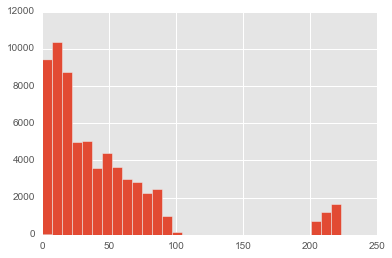

In [45]:
df['age'].hist(bins=30)

#### Age of Patient
**Infants code**
- 201 - Three weeks              
- 201 - Four weeks (one month)
- 201 - Seven weeks
- 202 - Ten weeks
- 209 - Nine months
- 212 - Twelve months (one year)
- 218 - Eighteen months

** 2+ years old** 
- code is the actual age years

** 114+ years old **

- If the patient is older than 115 years old, code the age as 114 and indicate the actual age in the narrative.




In [41]:
def age_group(age):
    
    if age in (201,202,209,212):
        age_gp='0-12Mons: Infants Baby'
    elif age in (218,2):
        age_gp='1-2yrs: Toddler'
    elif age in (3,4,5):
        age_gp='3-5yrs: Preschool'
    elif age in (6,7,8,9,10,11,12):
        age_gp='6-12yrs: Gradeschooler'
    elif age in (13,14,15,16,12,17):
        age_gp='13-17yrs: Teen'
    elif age in (18,19,20,21):
        age_gp='18-21: Young Adult'
    elif age>21 and age<63:
        age_gp='22-62: Adult'
    elif age>=63 and age<115:
        age_gp='62+: Older'
    else:
        age_gp='Not recorded'
    
    return age_gp

In [43]:
df['age_gp']=df[['age']].apply(age_group,axis=1)

IndexError: indices are out-of-bounds

In [35]:
df.groupby(['age']).size()

age
0         1
2      2146
3      1748
4      1489
5      1380
6      1301
7      1341
8      1267
9      1227
10     1384
11     1485
12     1606
13     1715
14     1664
15     1536
16     1462
17     1330
18     1009
19      903
20      837
21      847
22      832
23      748
24      768
25      717
26      704
27      715
28      660
29      655
30      700
       ... 
98       36
99       25
100      11
101      19
102       3
103       4
105       1
201     103
202      51
203      64
204      67
205      89
206     123
207     119
208     134
209     122
210     162
211     159
212     194
213     189
214     200
215     188
216     178
217     189
218     229
219     207
220     234
221     212
222     212
223     181
dtype: int64

(array([ 0.01826783,  0.02295075,  0.01260588,  0.01009669,  0.00815403,
         0.00847581,  0.00764055,  0.00591013,  0.00511595,  0.00474282,
         0.00186735,  0.00010783,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00064014,  0.00239965,  0.00313222]),
 array([   0.  ,    8.92,   17.84,   26.76,   35.68,   44.6 ,   53.52,
          62.44,   71.36,   80.28,   89.2 ,   98.12,  107.04,  115.96,
         124.88,  133.8 ,  142.72,  151.64,  160.56,  169.48,  178.4 ,
         187.32,  196.24,  205.16,  214.08,  223.  ]),
 <a list of 25 Patch objects>)

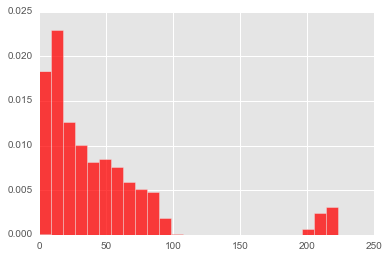

In [29]:
plt.hist(df['age'] , 25, normed=1, facecolor='r', alpha=0.75)